In [1]:
using LinearAlgebra, Plots, Statistics

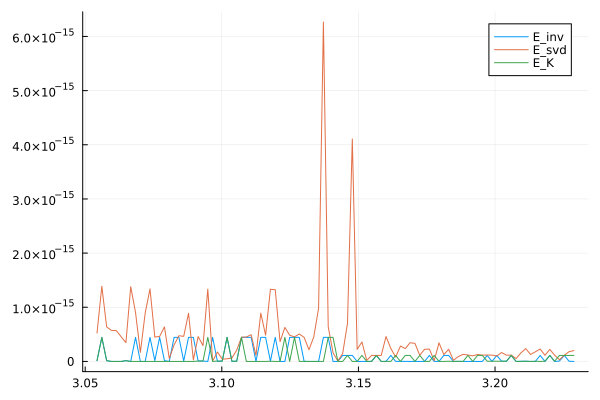

In [2]:
Λ = [0 1 0;
     0 0 1;
     1 0 0]
E = [0 -1;1 0]
x = [1;0]
y = [0;1]

ξA = [1;0;0]
function ζ(r,s)
    return [s;s'*E*r]
end

Pi = 3.1415926535

a = 1
b = 2
c = 1.5
d = 2.5

ε = 5Pi/180
N = 100

θA = range(Pi-ε,Pi+ε,length=N)
    Ab = 2b*(a*cos.(θA).-d)
    Bb = 2b*a*sin.(θA)
    Cb = c^2 .-a^2 .-b^2 .-d^2 .+2a*d*cos.(θA)
θB = atan.(Bb,Ab)-acos.(Cb./sqrt.(Ab.^2+Bb.^2))
ptA = zeros(N,2)
ptB = ptA + a*[cos.(θA) sin.(θA)]
ptD = [d*ones(N) zeros(N)]
ptC = ptB + b*[cos.(θB) sin.(θB)]


E_inv=zeros(N)
E_svd=zeros(N)
E_K=zeros(N)

for i in 1:N
    ζ1 = ζ(ptD[i,:]-ptA[i,:],x)
    ζ2 = ζ(ptD[i,:]-ptA[i,:],y)
    rBC = (ptC[i,:]-ptB[i,:])
    sBC = rBC/norm(rBC)
    ζ3 = ζ(ptB[i,:]-ptA[i,:],sBC)
    
    A = [ζ1 ζ2 ζ3]'*Λ
    B = [0;0;ζ3'*Λ*ξA]
    K = (ζ1×ζ2)*ζ3'/((ζ1×ζ2)'*ζ3)
    
    B_inv = A*inv(A)*B
    e_inv = B_inv-B
    E_inv[i] = norm(e_inv[2:3])
    
    U, S, V = svd(A)
    C = (U'*B)./S;
    B_svd = A*(V * C)
    e_svd = B_svd-B
    E_svd[i] = norm(e_svd[2:3])
    
    e_K = A*(Λ'*K*Λ*ξA)-B
    E_K[i] = norm(e_K[2:3])
    

    
    
end
plot(θA,E_inv,label="E_inv")
plot!(θA,E_svd,label="E_svd")
plot!(θA,E_K,label="E_K")

In [3]:
median(E_K)/median(E_K) 

1.0

In [4]:
median(E_inv)/median(E_K)

4.0

In [5]:
median(E_svd)/median(E_K) 

264.1248557725876